In [1]:
# importing libraries
import pandas as pd
import plotnine as p9
import random as random

# setting seed for random
random.seed(634)

In [12]:
# 4a
# takes a population size n and a number of drug users d and returns a list of size n with d True values and n - d False values
# the Trues represent drug users, the Falses represent non-drug users
def true_false_values (population_size, drug_users):
    # initiate empty return list and count of recorded drug users
    ret = []
    count = 0

    # for every individual in population determine whether is drug user
    for i in range (0, population_size):
        # if 0 then true, if 1 then false
        status = random.sample([0,1], 1)[0]

        # if true and the number of drug users has not exceeded limit
        if((status == 0) and (count < drug_users)):
            ret.append(True)
            count += 1

        # if false
        else:
            ret.append(False)
    return ret

# testing function
print(true_false_values(10,2))
print(true_false_values(10,2))
print(true_false_values(10,2))

[False, False, False, True, True, False, False, False, False, False]
[False, True, False, False, True, False, False, False, False, False]
[True, True, False, False, False, False, False, False, False, False]


In [3]:
# 4b
# selects a sample from a population and returns that sample's responses
# for each study participant, they flip a coin (heads = 0, tails = 1)
# if heads" (0), they flip a coin and either report True or False
# if "tails" (1), they report their drug use status (True or False)
def sample_select(population, sample_size):
    # taking a random sample of size sample_size from population
    sample = random.sample(population, sample_size)

    # initiate response list
    ret = []

    # for each individual participant in the sample taken,
    # perform 1 or 2 coin flips depending on first coin flip result
    for person in sample:
        # first coin flip
        first_flip = random.sample([0,1], 1)[0]

        # if heads
        if(first_flip == 0):
            #flip again
            second_flip = random.sample([0,1], 1)[0]
            if(second_flip == 0):
                ret.append(True)
            else:
                ret.append(False)

        # if tails
        else:
            ret.append(person)
    return ret

# testing function
sample_select(true_false_values(100,10), 50)

[False,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False]

In [26]:
# 4c
# takes parameters for the total population, the true number of drug users in the population, the sample size
# returns the predicted number of drug users in the population
# returned number is int because people cannot exist in fractions
def predicted_drug_users(population_size, drug_users, sample_size):
    # initialize dataset
    data = true_false_values(population_size, drug_users)

    # obtain responses
    responses = sample_select(data, sample_size)

    # calculate p based on True-rate in responses
    p = max(0, 2*(responses.count(True)/len(responses) - 0.25))

    # return whole number of predicted drug users in the population
    return int(0.25*population_size + 0.5*p*population_size)

# testing function
print("Observed E(yes) in population of 1000 is", predicted_drug_users(1000, 100, 500))
print("Calculated E(yes) in population of 1000 is", int((0.25+0.5*(100/1000))*1000))

Observed E(yes) in population of 1000 is 308
Calculated E(yes) in population of 1000 is 300


In [27]:
# 4d
print("The estimated number of drug users in a population 1000, 100 of whom are drug users, and sample size is 50, the estimated number of drug users using 4(c) is", predicted_drug_users(1000, 100, 500))

The estimated number of drug users in a population 1000, 100 of whom are drug users, and sample size is 50, the estimated number of drug users using 4(c) is 284


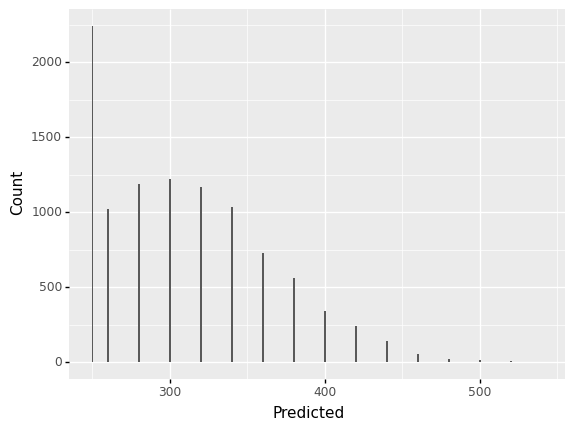

In [30]:
# 4e
# obtain 1000 trial data of simulation in dataframe format
def obtain_mapping(n, pop, users, sample):
    d = {}
    for i in range(0, n):
        val = predicted_drug_users(pop, users, sample)
        if(val in d):
            d[val] += 1
        else:
            d[val] = 1
    return d

# print histogram
def graph_predicted_users(trials, pop, users, sample):
    mapping = obtain_mapping(trials, pop, users, sample)
    predicted_users = pd.DataFrame(
        {
            "Predicted" : mapping.keys(),
            "Count" : mapping.values()
        }
    )
    print(
        p9.ggplot(predicted_users, p9.aes(x = "Predicted", y = "Count"))
        + p9.geom_bar(stat = "identity")
    )
# testing function
graph_predicted_users(10000, 1000, 100, 50)

The estimated number of drug users in a population 100000, 10000 of whom are drug users, and sample size is 5000, the estimated number of drug users using 4(c) is 29140


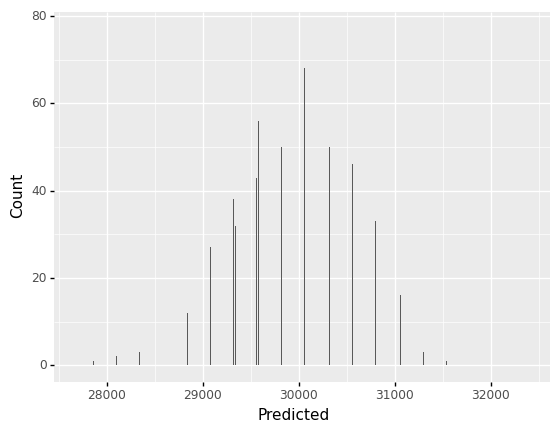

In [31]:
# 4f
# repeat p,.arts d and e but with everything scaled up by a factor of 100
graph_predicted_users(5000, 100000, 10000, 5000)

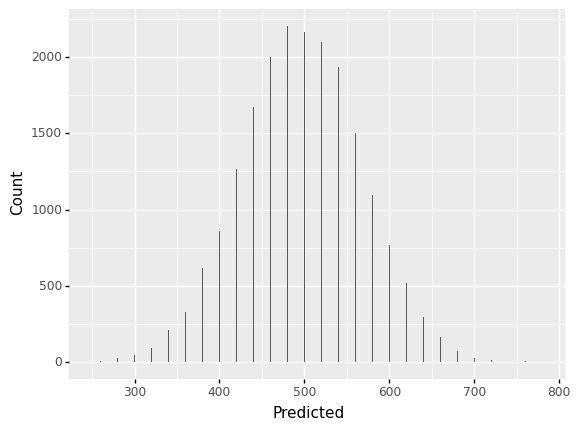

In [36]:
# 4g
# repeat parts d and e but with the smaller population but with higher drug usage rates
graph_predicted_users(20000, 1000, 500, 50)